In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import graphviz


In [ ]:
# Перенос данных из csv в sqlite
csv_file = 'dataset.csv'
sqlite_db = 'database.db'
df = pd.read_csv(csv_file)
conn = sqlite3.connect(sqlite_db)
table_name = 'data'
# Запись данных в таблицу (если таблицы не существует, она будет создана)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()
# Проверка содержимого базы данных
conn = sqlite3.connect(sqlite_db)
query_result = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
print(query_result)
conn.close()

   Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

# 1)Извлечение данных из базы данных в датафрейм


In [ ]:
sqlite_db = 'database.db'
conn = sqlite3.connect(sqlite_db)
query = 'SELECT * FROM data'
data = pd.read_sql_query(query, conn)
conn.close()
data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [ ]:
data = data.rename(columns={df.columns[0]: 'index'})

In [ ]:
data

,index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [ ]:
data.describe()

,index,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


# 2)Регрессия, логистическая регрессия, SVM

Регрессия

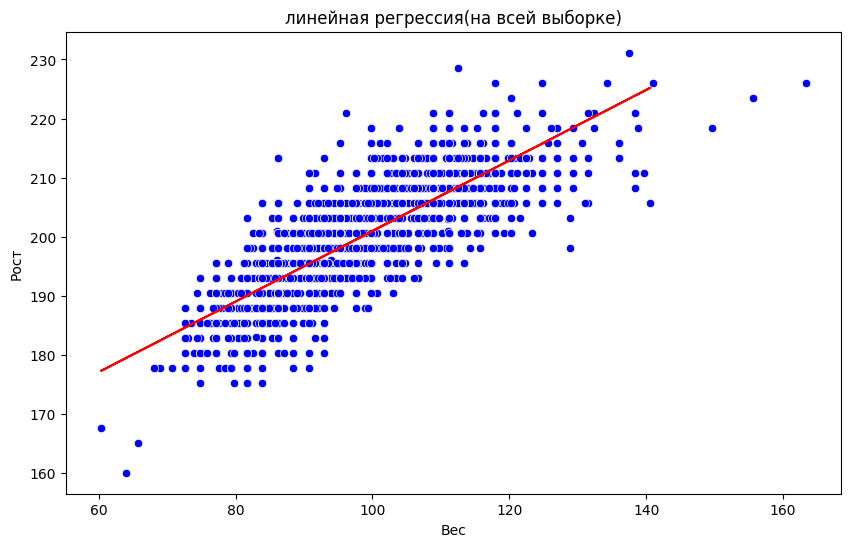

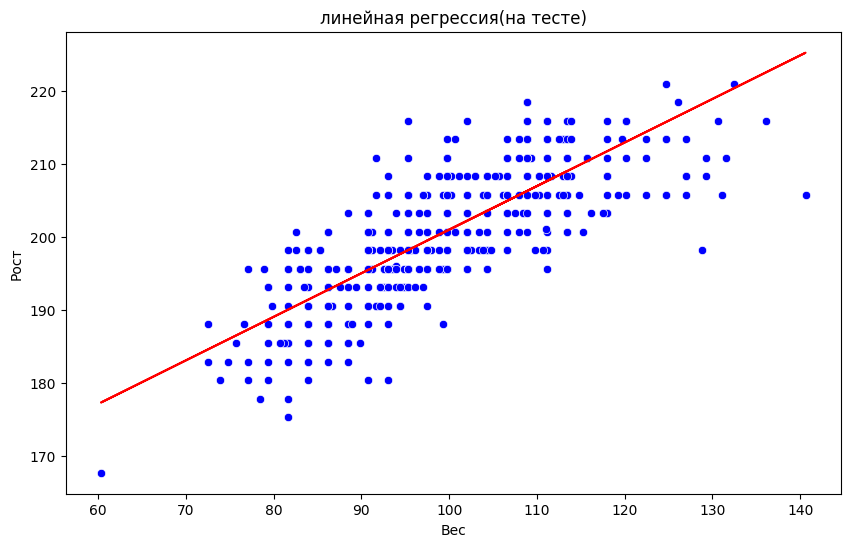

R^2 метрика на тестовых данных: 0.6091409048791133
MSE метрика на тестовых данных: 29.768759307579316


In [ ]:
# Фильтрация уникальных игроков
df_unique = data.drop_duplicates(subset=['player_name'])

X = df_unique[['player_weight']]
y = df_unique['player_height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

# Визуализация на всем наборе данных
plt.figure(figsize=(10, 6))
sns.scatterplot(x='player_weight', y='player_height', data=df_unique, color='blue')
plt.plot(X_test['player_weight'], y_pred, color='red')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('линейная регрессия(на всей выборке)')
plt.show()

# Визуализация на тестовой выборке
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['player_weight'], y=y_test, color='blue')
plt.plot(X_test['player_weight'], y_pred, color='red')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('линейная регрессия(на тесте)')
plt.show()

print(f"R^2 метрика на тестовых данных: {score}")
print(f"MSE метрика на тестовых данных: {mse}")

Логистическая регрессия

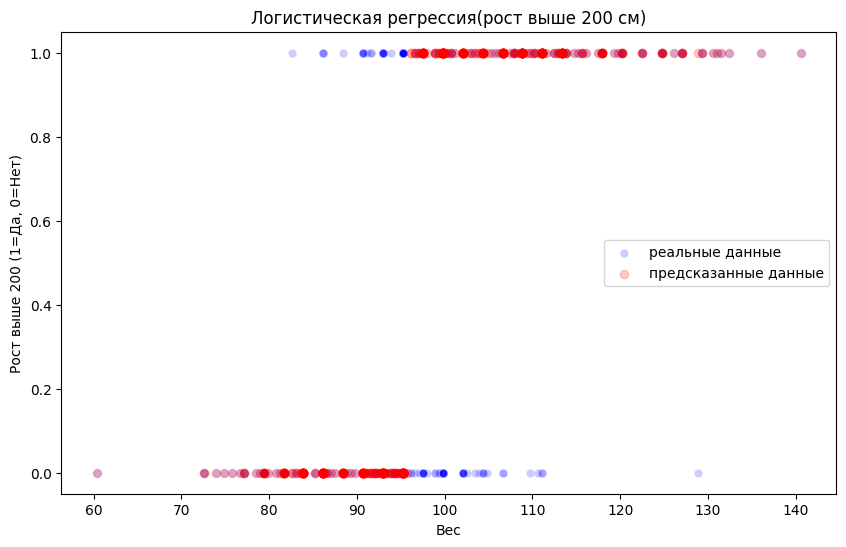

Accuracy на тестовых данных: 0.8235294117647058


In [ ]:
df_logit = data.drop_duplicates(subset=['player_name'])
df_logit = df_logit.copy()
# Создадим бинарный признак  1 будет если рост выше 200 см, 0 если рост 200 см или ниже
df_logit['height_above_200'] = (df_logit['player_height'] > 200).astype(int)

X = df_logit[['player_weight']]
y = df_logit['height_above_200']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['player_weight'], y=y_test, color='blue', label='реальные данные', alpha=0.2)
plt.scatter(X_test['player_weight'], y_pred, color='red', label='предсказанные данные', alpha=0.2)
plt.xlabel('Вес')
plt.ylabel('Рост выше 200 (1=Да, 0=Нет)')
plt.title('Логистическая регрессия(рост выше 200 см)')
plt.legend()
plt.show()

print(f"Accuracy на тестовых данных: {accuracy}")

SVM

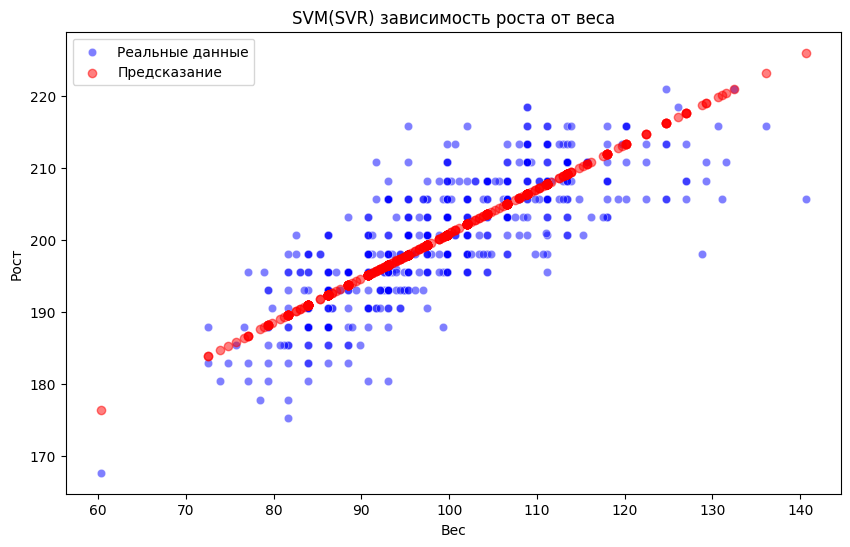

MSE на тесте: 30.089134291498585
R^2 на тесте: 0.6049344320792149


In [ ]:
df_svm = data.drop_duplicates(subset=['player_name'])

X = df_svm[['player_weight']]
y = df_svm['player_height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['player_weight'], y=y_test, color='blue', label='Реальные данные', alpha=0.5)
plt.scatter(X_test['player_weight'], y_pred, color='red', label='Предсказание', alpha=0.5)
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('SVM(SVR) зависимость роста от веса')
plt.legend()
plt.show()

print(f"MSE на тесте: {mse}")
print(f"R^2 на тесте: {r2}")

# 2)Дерево решений

In [ ]:
# Фильтрация данных за сезон 2010-11
df_2010_11 = data[data['season'] == '2010-11']

X = df_2010_11[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = df_2010_11['team_abbreviation']

# Кодирование целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=9)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy на тестовых данных: {accuracy}")

dot_data = export_graphviz(tree_model, out_file=None, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='pdf', cleanup=True)

Accuracy на тестовых данных: 0.04395604395604396


'decision_tree.pdf'

# 4)Классификация



Классификация за 2010-11 сезон целевой переменной pts (среднее число очков за игру) от характеристик 'age', 'player_height', 'player_weight','gp', 'net_rating', 'ts_pct','reb','ast' моделью random forest

In [ ]:
df = data[data['season'] == '2010-11']

df = df.dropna(subset=['pts', 'age', 'player_height','gp', 'player_weight', 'net_rating', 'ts_pct','reb','ast'])

# Разбить pts на три класса
df['pts_class'] = pd.qcut(df['pts'], q=3, labels=['Low', 'Medium', 'High'])

features = ['age', 'player_height', 'player_weight','gp', 'net_rating', 'ts_pct','reb','ast']
df_features = df[features]

X = df[features]
y = df['pts_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тесте: {accuracy}")

Accuracy на тесте: 0.7692307692307693
